# **Data analysis**

Una vez juntados las 4 bases de datos, RAVDESS, CREMA-D, TESS, SAVEE. Se analizará el dataset resultante

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import librosa
import math

In [3]:
df = pd.read_csv("./data/dataset.csv")

In [4]:
df.head()

,emotion_id,file_path
0,neutral,./archive/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,./archive/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,./archive/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,./archive/Actor_01/03-01-01-01-02-02-01.wav
4,neutral,./archive/Actor_01/03-01-02-01-01-01-01.wav


In [5]:
df.shape

(12162, 2)

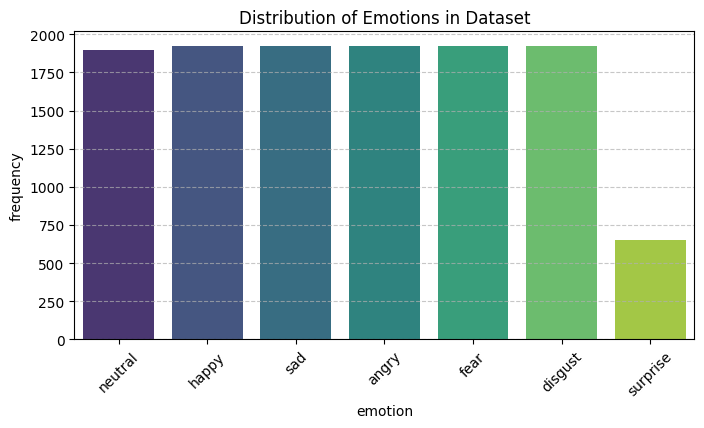

In [6]:
plt.figure(figsize=(8, 4))

sns.countplot(data=df, x="emotion_id", hue="emotion_id", palette="viridis", legend=False)

plt.xlabel("emotion")
plt.ylabel("frequency")
plt.title("Distribution of Emotions in Dataset")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

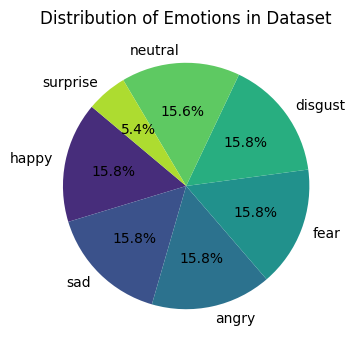

In [12]:
emotion_counts = df["emotion_id"].value_counts()

palette = sns.color_palette("viridis", n_colors=len(emotion_counts))

plt.figure(figsize=(4, 4))
plt.pie(
    emotion_counts, 
    labels=emotion_counts.index, 
    autopct="%1.1f%%", 
    colors=palette, 
    startangle=140, 
)

plt.title("Distribution of Emotions in Dataset")

plt.show()

In [13]:
df["emotion_id"].value_counts()	

emotion_id
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: count, dtype: int64

In [35]:
df_neutral = df[df["emotion_id"] == 'neutral']
df_happy = df[df["emotion_id"] == 'happy']
df_angry = df[df["emotion_id"] == 'angry']

happy_random_ids = random.sample(df_happy["file_path"].tolist(), k=4)
angry_random_ids = random.sample(df_angry["file_path"].tolist(), k=4)
neutral_random_ids = random.sample(df_neutral["file_path"].tolist(), k=4)

print(happy_random_ids)
print(angry_random_ids)
print(neutral_random_ids)

['./archive/AudioWAV/1051_IOM_HAP_XX.wav', './archive/TESS Toronto emotional speech set data/OAF_happy/OAF_neat_happy.wav', './archive/AudioWAV/1028_IOM_HAP_XX.wav', './archive/ALL/JE_h10.wav']
['./archive/AudioWAV/1076_ITS_ANG_XX.wav', './archive/AudioWAV/1064_ITS_ANG_XX.wav', './archive/AudioWAV/1045_MTI_ANG_XX.wav', './archive/AudioWAV/1056_WSI_ANG_XX.wav']
['./archive/AudioWAV/1064_MTI_NEU_XX.wav', './archive/TESS Toronto emotional speech set data/OAF_neutral/OAF_numb_neutral.wav', './archive/AudioWAV/1061_DFA_NEU_XX.wav', './archive/AudioWAV/1058_TAI_NEU_XX.wav']


In [44]:
def plot_multiple_mel_spectrograms(audio_paths: list[str], emotion:str, n_mels=64):
    """
    Plotea múltiples gráficos de MFCC a partir de archivos de audio.
    
    Parámetros:
    - audio_paths: lista de rutas de archivos de audio.
    - n_mels: número de bandas 

    """
    
    num_audios = len(audio_paths)
    cols = 2  
    rows = math.ceil(num_audios / cols)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
    axes = np.array(axes).reshape(rows, cols)

    fig.suptitle(f"Mel spectogram of: {emotion}", fontsize=16, fontweight="bold")
    
    for i, audio_path in enumerate(audio_paths):
        row, col = divmod(i, cols) 
        y, sr = librosa.load(audio_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        S_db = librosa.power_to_db(S, ref=np.max)

        img = librosa.display.specshow(S_db, x_axis="time", sr=sr, cmap="viridis", ax=axes[row, col])
        axes[row, col].set_title(f"MFCC - {audio_path.split('/')[-1]}")
        fig.colorbar(img, ax=axes[row, col], format="%+2.0f dB")
    
    for i in range(num_audios, rows * cols):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

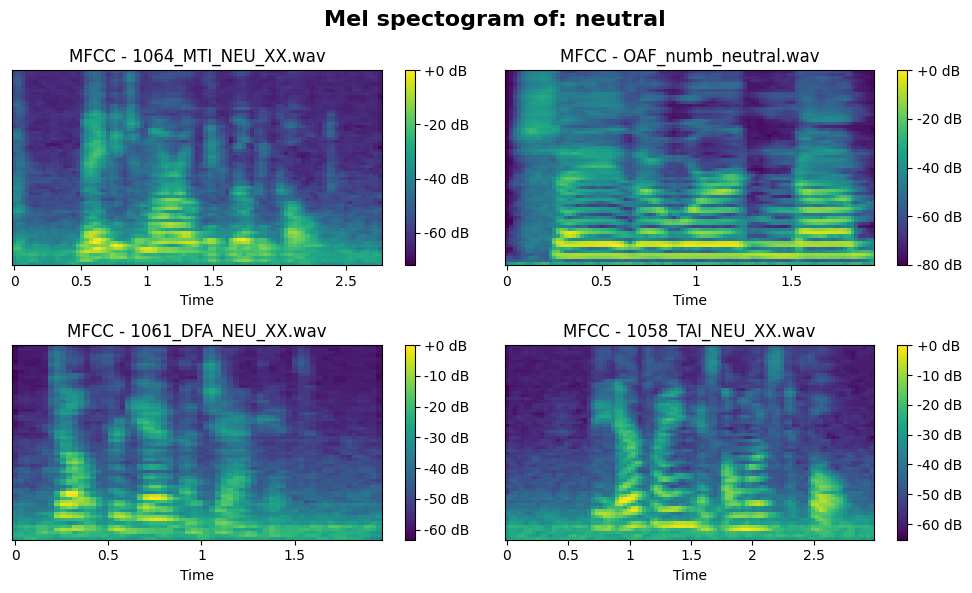

In [45]:
plot_multiple_mel_spectrograms(neutral_random_ids, "neutral")

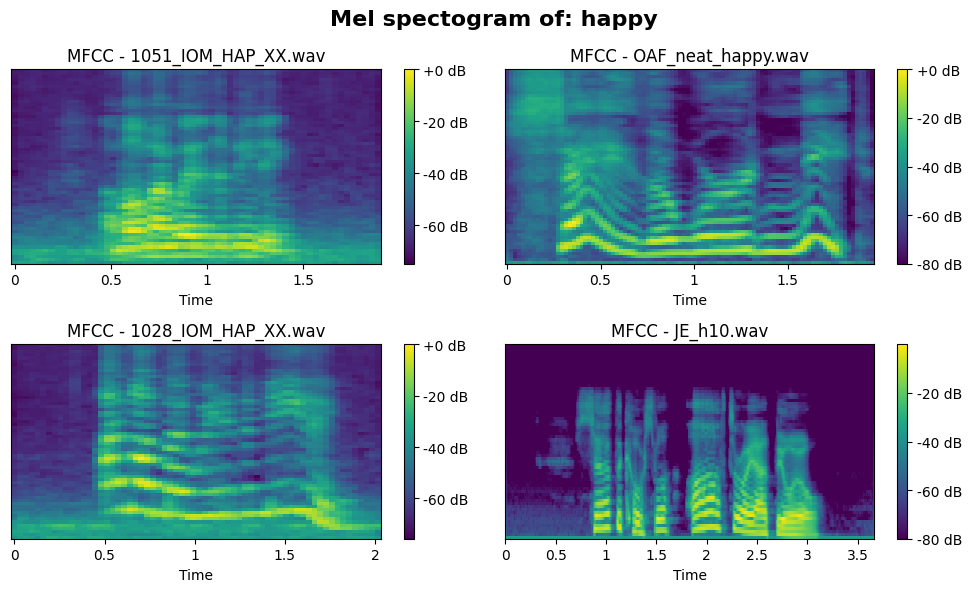

In [46]:
plot_multiple_mel_spectrograms(happy_random_ids, "happy")

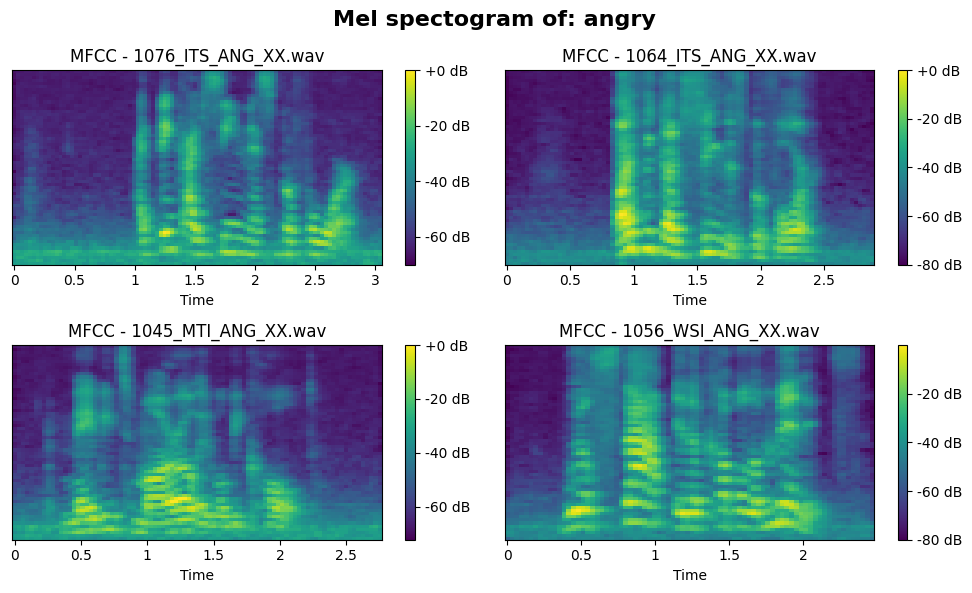

In [47]:
plot_multiple_mel_spectrograms(angry_random_ids, "angry")